# 03 - Bivariate Analysis

In [1]:
# All import insertions
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import isnull
from sklearn import preprocessing
import os    # For file paths
import re    # Regular Expressions

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Open files
df = pd.read_csv("../data/processed/data_univ.csv", low_memory=False)

In [3]:
df.dtypes.value_counts()

int64      40
object     13
float64     7
dtype: int64

In [4]:
df = df.loc[:, (df.dtypes == np.int64) | (df.dtypes == np.float64)]

In [5]:
df.var().sort_values()

Halfbacks                     0.000070
Quarterbacks                  0.004818
RunningBacks                  0.051521
Fullbacks                     0.132468
isFirstDown                   0.165737
TimeSnapDiff                  0.211353
IsPossTeamInLead              0.233569
IsPossTeamInDeficit           0.243447
isPlayDirectionLeft           0.249982
isHomeTeam                    0.249992
Centers                       0.286377
NoseTackles                   0.289793
Safeties                      0.295850
DistanceBins                  0.306017
TurfeCode                     0.315186
OffensiveTackles              0.324058
TightEnds                     0.424634
Down                          0.448715
OffensiveGuards               0.488774
Cornerbacks                   0.537661
WideReceivers                 0.616822
Season                        0.620776
DefensiveTackles              0.704865
DefensiveEnds                 0.761199
LineBackers                   0.800959
StadiumTypeCode          

In [6]:
df.drop(['Quarterbacks','Halfbacks','RunningBacks','Fullbacks'], axis=1, inplace=True)

In [7]:
#Correlation with output variable
cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["isFirstDown"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Yards          0.520142
isFirstDown    1.000000
Name: isFirstDown, dtype: float64

In [8]:
df.drop(['Yards'], axis=1, inplace=True)

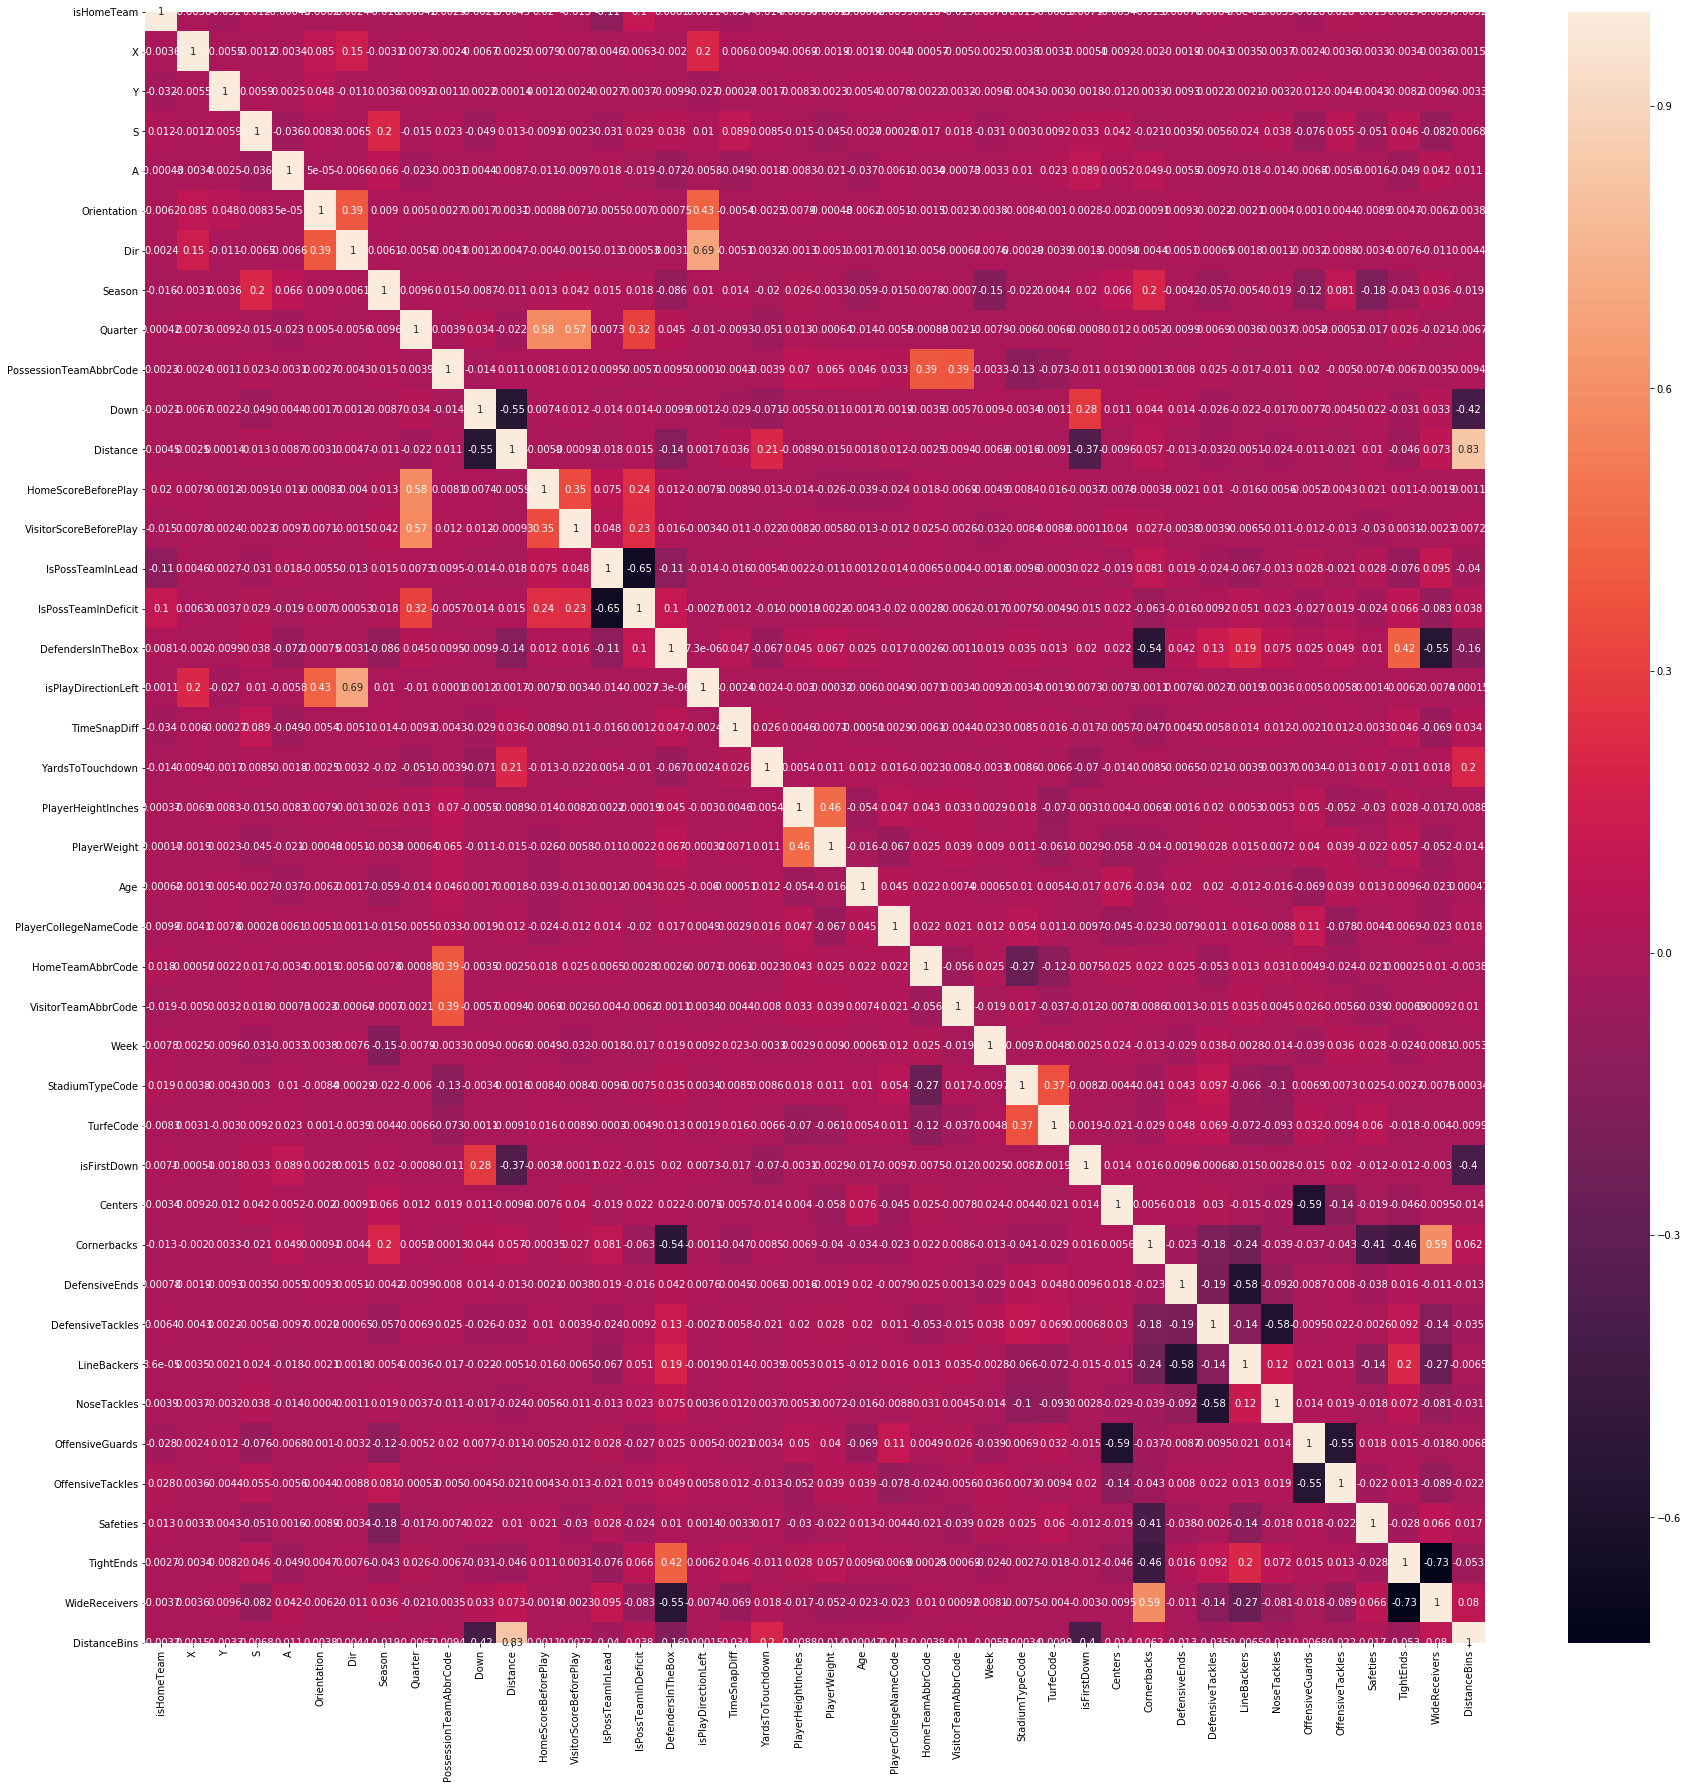

In [9]:
corrMatrix = df.corr(method = "kendall")
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(corrMatrix, annot=True)
plt.savefig("../reports/figures/data_corr_matrix.png")

## Checking Correlation between Lead and Deficiit

In [10]:
print(df[["IsPossTeamInLead","IsPossTeamInDeficit"]].corr())

                     IsPossTeamInLead  IsPossTeamInDeficit
IsPossTeamInLead             1.000000            -0.653294
IsPossTeamInDeficit         -0.653294             1.000000


In [11]:
df.drop(['IsPossTeamInDeficit'], axis=1, inplace=True)

In [12]:
df.dtypes

isHomeTeam                  int64
X                         float64
Y                         float64
S                         float64
A                         float64
Orientation               float64
Dir                       float64
Season                      int64
Quarter                     int64
PossessionTeamAbbrCode      int64
Down                        int64
Distance                    int64
HomeScoreBeforePlay         int64
VisitorScoreBeforePlay      int64
IsPossTeamInLead            int64
DefendersInTheBox           int64
isPlayDirectionLeft         int64
TimeSnapDiff              float64
YardsToTouchdown            int64
PlayerHeightInches          int64
PlayerWeight                int64
Age                         int64
PlayerCollegeNameCode       int64
HomeTeamAbbrCode            int64
VisitorTeamAbbrCode         int64
Week                        int64
StadiumTypeCode             int64
TurfeCode                   int64
isFirstDown                 int64
Centers       

In [13]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

In [14]:
to_drop

['isPlayDirectionLeft', 'WideReceivers', 'DistanceBins']

In [15]:
print(df[["TightEnds","WideReceivers"]].corr())

               TightEnds  WideReceivers
TightEnds       1.000000      -0.758254
WideReceivers  -0.758254       1.000000


In [16]:
df.drop(['WideReceivers'], axis=1, inplace=True)

In [17]:
print(df[["OffensiveGuards","OffensiveTackles"]].corr())

                  OffensiveGuards  OffensiveTackles
OffensiveGuards          1.000000         -0.594713
OffensiveTackles        -0.594713          1.000000


In [18]:
df.drop(['OffensiveTackles'], axis=1, inplace=True)

In [19]:
df.shape

(28511, 39)

In [20]:
df.to_csv("../data/processed/data_bivariate.csv", index=False)